In [1]:
import pandas as pd

url = "http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal1.dta"
df = pd.read_stata(url)
df.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [8]:
import statsmodels.api as sm
x = df.roe
x = sm.add_constant(x)
y = df.salary

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 06 Nov 2020   Prob (F-statistic):             0.0978
Time:                        20:42:45   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
df['salary_prediction'] = model.predict(x)
df.head(15)

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales,salary_prediction
0,1095,20,27595.000000,14.100000,106.400002,191,1,0,0,0,6.998509,10.225389,1224.058071
1,1001,32,9958.000000,10.900000,-30.600000,13,1,0,0,0,6.908755,9.206132,1164.854261
2,1122,9,6125.899902,23.500000,-16.299999,14,1,0,0,0,7.022868,8.720281,1397.969216
3,578,-9,16246.000000,5.900000,-25.700001,-21,1,0,0,0,6.359574,9.695602,1072.348338
4,1368,7,21783.199219,13.800000,-3.000000,56,1,0,0,0,7.221105,9.988894,1218.507712
5,1145,5,6021.399902,20.000000,1.000000,55,1,0,0,0,7.043160,8.703075,1333.215063
6,1078,10,2266.699951,16.400000,-5.900000,62,1,0,0,0,6.982863,7.726080,1266.610785
7,1094,7,2966.800049,16.299999,-1.600000,44,1,0,0,0,6.997596,7.995239,1264.760660
8,1237,16,4570.200195,10.500000,-70.199997,37,1,0,0,0,7.120444,8.427312,1157.453793
9,833,5,2830.000000,26.299999,-23.900000,37,1,0,0,0,6.725034,7.948032,1449.772523


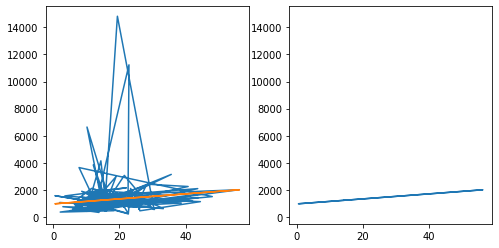

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
plt.plot( df.roe, df.salary)
plt.plot(df.roe, df.salary_prediction)
plt.subplot(122, sharey = ax1)
plt.plot(df.roe, df.salary_prediction)

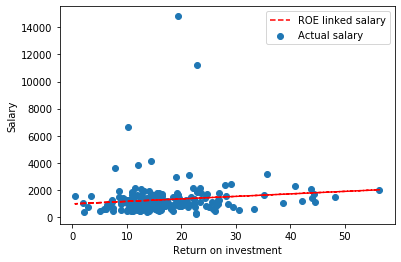

In [25]:
plt.figure()
plt.scatter(df.roe, df.salary)
plt.plot(df.roe,df.salary_prediction,'--r')
plt.xlabel('Return on investment')
plt.ylabel('Salary')
plt.legend(['ROE linked salary','Actual salary'])